In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [2]:
train=pd.read_csv("uber_nyc_enriched.csv")
train.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


In [3]:
total=train.isnull().sum().sort_values(ascending=False) # checking the number of null values
percent=(train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
pd.concat([total,percent],keys=['Total','Percent'],axis=1)

,Total,Percent
borough,3043,0.104567
hday,0,0.000000
sd,0,0.000000
pcp24,0,0.000000
pcp06,0,0.000000
pcp01,0,0.000000
slp,0,0.000000
dewp,0,0.000000
temp,0,0.000000
vsb,0,0.000000


In [4]:
print(train.shape)
# train=train[train.borough.notnull()]
# print(train.shape)

(29101, 13)


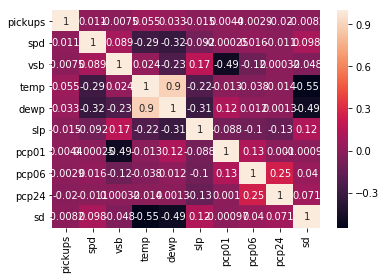

In [5]:
import seaborn as sns
cr=train.corr()
sns.heatmap(cr,annot=True)
plt.show()

In [6]:
train.replace('Y',1,inplace=True)# performing the replacement of the categorical values of hday
train.replace('N',0,inplace=True)

In [7]:
train.replace("Bronx",1,inplace=True) # performing the replacement of the categorical values of Borough
train.replace("Brooklyn",2,inplace=True)
train.replace("EWR",3,inplace=True)
train.replace("Manhattan",4,inplace=True)
train.replace("Queens",5,inplace=True)
train.replace("Staten Island",6,inplace=True)
train.fillna(0,inplace=True)

In [8]:
train.groupby(['borough']).count()

,pickup_dt,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
borough,,,,,,,,,,,,
0.0,3043,3043,3043,3043,3043,3043,3043,3043,3043,3043,3043,3043
1.0,4343,4343,4343,4343,4343,4343,4343,4343,4343,4343,4343,4343
2.0,4343,4343,4343,4343,4343,4343,4343,4343,4343,4343,4343,4343
3.0,4343,4343,4343,4343,4343,4343,4343,4343,4343,4343,4343,4343
4.0,4343,4343,4343,4343,4343,4343,4343,4343,4343,4343,4343,4343
5.0,4343,4343,4343,4343,4343,4343,4343,4343,4343,4343,4343,4343
6.0,4343,4343,4343,4343,4343,4343,4343,4343,4343,4343,4343,4343


In [9]:
train.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,1.0,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1
1,2015-01-01 01:00:00,2.0,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1
2,2015-01-01 01:00:00,3.0,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1
3,2015-01-01 01:00:00,4.0,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1
4,2015-01-01 01:00:00,5.0,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1


In [10]:
import re # method to sperate the time and date
def dtform(a):
    date=[]
    time=[]
    for i in a:
        t=i.split()
        date.append(t[0])
        time.append(re.sub(':','',t[1]))
    date=pd.DataFrame(date)
    time=pd.DataFrame(time)
    dt_pickup=pd.concat([date,time],axis=1)
    dt_pickup.columns=['date','time']
    return dt_pickup

In [11]:
dt_time=dtform(train.pickup_dt)
dt_time.time=dt_time.time.astype(float)
dt_time.loc[:,['time']]/=10000
print(dt_time.shape)
train.drop('pickup_dt',inplace=True,axis=1)
print(train.shape)
train=pd.concat([dt_time,train],axis=1,ignore_index=True)
train.columns=['date','time','borough','pickups','spd','vsb','temp','dewp','slp','pcp01','pcp06','pcp24','sd','hday']
train.head()
train3=train

(29101, 2)
(29101, 12)


In [12]:
total=train.isnull().sum().sort_values(ascending=False)
percent=(train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
pd.concat([total,percent],keys=['Total','Percent'],axis=1)

,Total,Percent
hday,0,0.0
sd,0,0.0
pcp24,0,0.0
pcp06,0,0.0
pcp01,0,0.0
slp,0,0.0
dewp,0,0.0
temp,0,0.0
vsb,0,0.0
spd,0,0.0


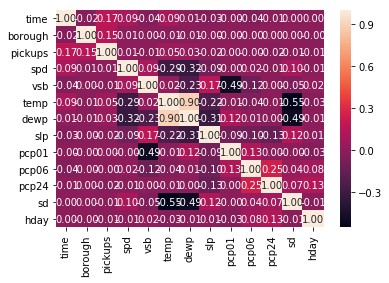

In [13]:
cr=train.corr()
sns.heatmap(cr,cbar=True,annot=True,fmt='.2f',annot_kws={'size':10})
plt.show()

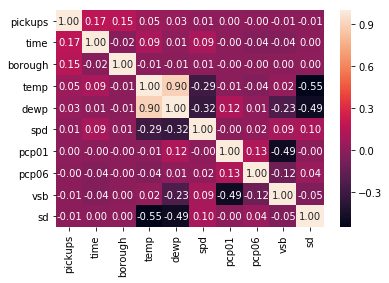

In [14]:
col=train.corr().nlargest(10,'pickups').index
cr=np.corrcoef(train[col].values.T)
sns.heatmap(cr,cbar=True,annot=True,fmt='.2f',annot_kws={'size':10},yticklabels=col.values,xticklabels=col.values)
plt.show()

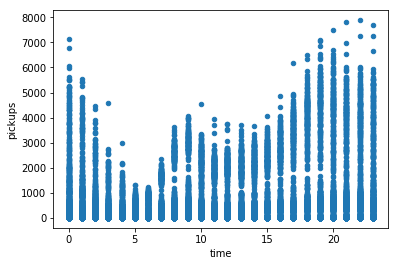

In [15]:
df=pd.concat([train.time,train.pickups],axis=1) # graph for the relation between time and number of pickups
df.plot.scatter(x='time',y='pickups')
plt.show()

In [16]:
# train['pickups']=np.cbrt(train['pickups'])
# df=pd.concat([train.time,train.pickups],axis=1)
# df.plot.scatter(x='time',y='pickups')

In [17]:
train.describe()

,time,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
count,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000
mean,11.597574,3.134016,490.215903,5.984924,8.818125,47.669042,30.823065,1017.817938,0.003830,0.026129,0.090464,2.529169,0.038521
std,6.907042,1.938765,995.649536,3.699007,2.442897,19.814969,21.283444,7.768796,0.018933,0.093125,0.219402,4.520325,0.192454
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-16.000000,991.400000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,1.000000,3.000000,9.100000,32.000000,14.000000,1012.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,3.000000,54.000000,6.000000,10.000000,46.000000,30.000000,1018.200000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,5.000000,449.000000,8.000000,10.000000,64.500000,50.000000,1022.900000,0.000000,0.000000,0.050000,2.958333,0.000000
max,23.000000,6.000000,7883.000000,21.000000,10.000000,89.000000,73.000000,1043.400000,0.280000,1.240000,2.100000,19.000000,1.000000


In [18]:
trgt=train.loc[:,'pickups']
# x=train.loc[:,['borough','time','hday']]
x=train.drop('pickups',axis=1)
x=x.drop(['date'],axis=1)

In [19]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error as mse
x_train,x_val,y_train,y_val=train_test_split(x,trgt,test_size=0.03,random_state=42) # generating the test and train cases

In [20]:
from sklearn.linear_model import LinearRegression,Lasso
lr=LinearRegression(normalize=True) # Creating the linear model
lrr=lr.fit(x_train,y_train)
y_pred=lrr.predict(x_val)
print("rsquare Score",lrr.score(x_val,y_val))
print("rmse: ",np.sqrt(mse(y_val,y_pred)))

rsquare Score 0.06968360042605615
rmse:  1023.4031056163606


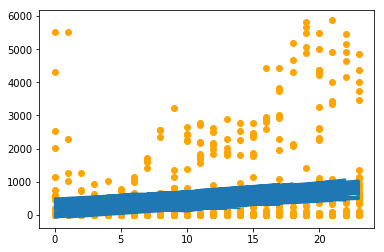

In [21]:
plt.scatter(x_val['time'],y_val,color='#FFA500')
plt.plot(x_val['time'],y_pred)
plt.show()#Plotting the orginal datavalues with the genrated model

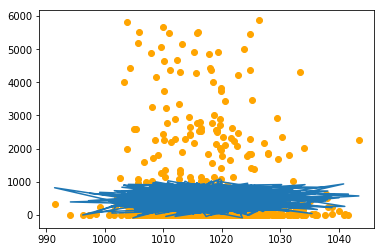

In [22]:
plt.scatter(x_val['slp'],y_val,color='#FFA500')
plt.plot(x_val['slp'],y_pred)
plt.show()

In [23]:
# ls=Lasso()
# lsr=ls.fit(x_train,y_train)
# y_pred=lsr.predict(x_val)
# print("rsquare Score",lsr.score(x_val,y_val))
# print("rmse: ",np.sqrt(mse(y_val,y_pred)))

In [24]:
# plt.scatter(x_val['time'],y_val,color='#FFA500')
# plt.plot(x_val['time'],y_pred)
# plt.show()

In [25]:
from sklearn.ensemble import RandomForestRegressor
clf_rf=RandomForestRegressor(random_state=42)
cr=clf_rf.fit(x_train,y_train)# generating the Random Forest Model
y_pred=cr.predict(x_val)
print("rsquare Score",cr.score(x_val,y_val))
print("rmse: ",np.sqrt(mse(y_val,y_pred)))
print("Summary")

E:\WPy-3670\python-3.6.7.amd64\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


rsquare Score 0.9270479717942325
rmse:  286.5827709198526
Summary


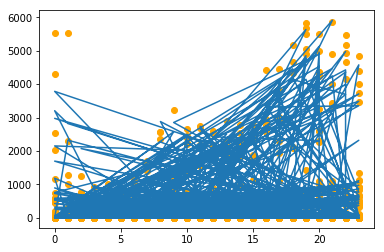

In [26]:
plt.scatter(x_val['time'],y_val,color='#FFA500')
plt.plot(x_val['time'],y_pred)
plt.show()#Plotting the orginal datavalues with the genrated model

In [27]:
train.groupby(['hday']).describe()

borough                                                  dewp  \
        count      mean       std  min  25%  50%  75%  max    count   
hday                                                                  
0     27980.0  3.134239  1.938655  0.0  1.0  3.0  5.0  6.0  27980.0   
1      1121.0  3.128457  1.942362  0.0  1.0  3.0  5.0  6.0   1121.0   

                 ...   time            vsb                                  \
           mean  ...    75%   max    count      mean       std   min   25%   
hday             ...                                                         
0     30.857505  ...   18.0  23.0  27980.0  8.807175  2.462304  0.00   9.1   
1     29.963440  ...   18.0  23.0   1121.0  9.091432  1.875426  2.06  10.0   

                        
       50%   75%   max  
hday                    
0     10.0  10.0  10.0  
1     10.0  10.0  10.0  

[2 rows x 96 columns]

## Performing regression on Balanced Dataset
Trying to perforn the regression on balancing datset to check whether the Borough and time are the only significanlty corelated facotr or there are any missing significant factors such as Holiday.

In [28]:
t1=train[train['hday']==1]
t2=train[train['hday']==0]
t1.reset_index(drop=True,inplace=True)
t2.reset_index(drop=True,inplace=True)
print(t1.shape)
print(t2.shape)

(1121, 14)
(27980, 14)


In [29]:
t22=t2.loc[:1120,:] # trying to get a blanced dataset
print(t22.shape)

(1121, 14)


In [30]:
train2=pd.concat([t1,t22],axis=0,ignore_index=True)
print(train2.shape)
train2.reset_index(drop=True,inplace=True)
train2.head()

(2242, 14)


,date,time,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01,1.0,1.0,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1
1,2015-01-01,1.0,2.0,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1
2,2015-01-01,1.0,3.0,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1
3,2015-01-01,1.0,4.0,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1
4,2015-01-01,1.0,5.0,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1


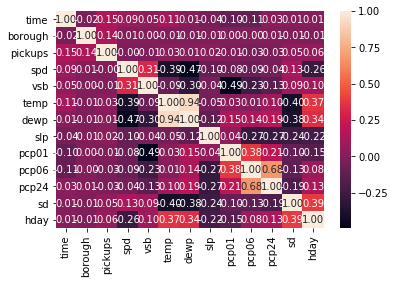

In [31]:
cr=train2.corr()
sns.heatmap(cr,cbar=True,annot=True,fmt='.2f',annot_kws={'size':10})
plt.show()

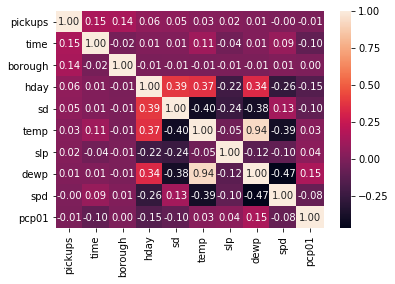

In [32]:
col=train2.corr().nlargest(10,'pickups').index
cr=np.corrcoef(train2[col].values.T)
sns.heatmap(cr,cbar=True,annot=True,fmt='.2f',annot_kws={'size':10},yticklabels=col.values,xticklabels=col.values)
plt.show()# showing top 10 correaltion with the pickups

In [33]:
trgt2=train2.loc[:,'pickups']
# x2=train2.loc[:,['borough','hday']]
x2=train2.drop(['pickups','date'],axis=1)

In [34]:
x_train,x_val,y_train,y_val=train_test_split(x2,trgt2,test_size=0.03,random_state=42)

In [35]:
# t21=t2.loc[1121:,:]
# print(t21.shape)

In [36]:
# t21trgt=t21.loc[:,'pickups']
# x21=t21.drop(['pickups','date'],axis=1)

In [37]:
# print(y_val.shape)
# x21=x21.loc[:,['borough','time','hday']]
# x_val=pd.concat([x_val,x21],axis=0,ignore_index=True)
# y_val=pd.concat([y_val,t21trgt],axis=0,ignore_index=True)
# print(x_val.shape)
# print(y_val.shape)

In [38]:
lr=LinearRegression(normalize=True) # linear model for the blanced dataset
lrr=lr.fit(x_train,y_train)
y_pred=lrr.predict(x_val)
print("rsquare Score",lrr.score(x_val,y_val))
# print("rsquare Score with nonholidays",lrr.score(x21,t21trgt))
print("rmse: ",np.sqrt(mse(y_val,y_pred)))

rsquare Score 0.09493219253536811
rmse:  684.2726899524362


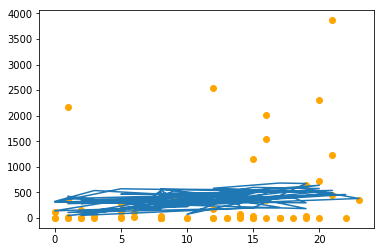

In [39]:
plt.scatter(x_val['time'],y_val,color='#FFA500')
plt.plot(x_val['time'],y_pred)
plt.show()

In [40]:
clf_rf=RandomForestRegressor(random_state=42) # non-linear model to the blanced dataset
cr=clf_rf.fit(x_train,y_train)
y_pred=cr.predict(x_val)
print("rsquare Score",cr.score(x_val,y_val))
# print("rsquare Score with nonholidays",cr.score(x21,t21trgt))
print("rmse: ",np.sqrt(mse(y_val,y_pred)))

E:\WPy-3670\python-3.6.7.amd64\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


rsquare Score 0.9019296100766879
rmse:  225.2462655562991


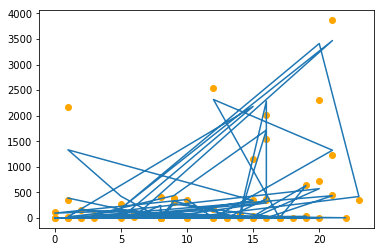

In [41]:
plt.scatter(x_val['time'],y_val,color='#FFA500')
plt.plot(x_val['time'],y_pred)
plt.show()

#### We can try to convert the categorical data in just the format of 0's and 1's by adding the extra columns and check which is the most significant borugh and shows more impact on the model

In [42]:
train3.head()

,date,time,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01,1.0,1.0,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1
1,2015-01-01,1.0,2.0,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1
2,2015-01-01,1.0,3.0,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1
3,2015-01-01,1.0,4.0,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1
4,2015-01-01,1.0,5.0,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1


In [43]:
train3.borough.replace(1,"Bronx",inplace=True)
train3.borough.replace(2,"Brooklyn",inplace=True)
train3.borough.replace(3,"EWR",inplace=True)
train3.borough.replace(4,"Manhattan",inplace=True)
train3.borough.replace(5,"Queens",inplace=True)
train3.borough.replace(6,"Staten Island",inplace=True)
train3.borough.replace(0,"others",inplace=True)
train3.hday.replace(1,'Yes',inplace=True)
train3.hday.replace(0,'No',inplace=True)
train3.head()

,date,time,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01,1.0,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Yes
1,2015-01-01,1.0,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Yes
2,2015-01-01,1.0,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Yes
3,2015-01-01,1.0,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Yes
4,2015-01-01,1.0,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Yes


In [44]:
train3=pd.get_dummies(train3,columns=['borough','hday'])

In [45]:
train3.head()

,date,time,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,...,sd,borough_Bronx,borough_Brooklyn,borough_EWR,borough_Manhattan,borough_Queens,borough_Staten Island,borough_others,hday_No,hday_Yes
0,2015-01-01,1.0,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,...,0.0,1,0,0,0,0,0,0,0,1
1,2015-01-01,1.0,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,...,0.0,0,1,0,0,0,0,0,0,1
2,2015-01-01,1.0,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,...,0.0,0,0,1,0,0,0,0,0,1
3,2015-01-01,1.0,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,...,0.0,0,0,0,1,0,0,0,0,1
4,2015-01-01,1.0,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,...,0.0,0,0,0,0,1,0,0,0,1


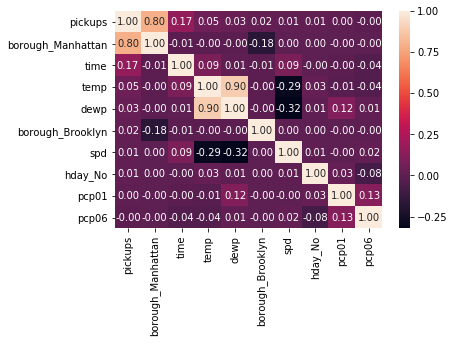

In [46]:
col=train3.corr().nlargest(10,'pickups').index
cr=np.corrcoef(train3[col].values.T)
sns.heatmap(cr,cbar=True,annot=True,fmt='.2f',annot_kws={'size':10},yticklabels=col.values,xticklabels=col.values)
plt.show()

In [47]:
trgt=train3.loc[:,'pickups']
x=train3.drop(['pickups','date'],axis=1)

In [48]:
x_train,x_val,y_train,y_val=train_test_split(x,trgt,test_size=0.03,random_state=42)

In [49]:
lr=LinearRegression(normalize=True)
lrr=lr.fit(x_train,y_train)
y_pred=lrr.predict(x_val)
print("rsquare Score",lrr.score(x_val,y_val))
print("rmse: ",np.sqrt(mse(y_val,y_pred)))

rsquare Score 0.7194921279739918
rmse:  561.9580786420191


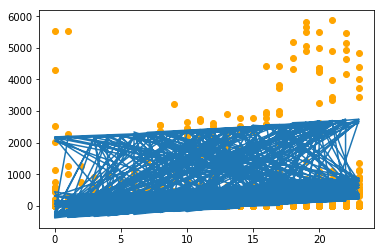

In [50]:
plt.scatter(x_val['time'],y_val,color='#FFA500')
plt.plot(x_val['time'],y_pred)
plt.show()

In [51]:
# ls=Lasso()
# lsr=ls.fit(x_train,y_train)
# y_pred=lsr.predict(x_val)
# print("rsquare Score",lsr.score(x_val,y_val))
# print("rmse: ",np.sqrt(mse(y_val,y_pred)))

In [52]:
# plt.scatter(x_val['slp'],y_val,color='#FFA500')
# plt.plot(x_val['slp'],y_pred)
# plt.show()

In [53]:
clf_rf=RandomForestRegressor(random_state=42)
cr=clf_rf.fit(x_train,y_train)
y_pred=cr.predict(x_val)
print("rsquare Score",cr.score(x_val,y_val))
print("rmse: ",np.sqrt(mse(y_val,y_pred)))

E:\WPy-3670\python-3.6.7.amd64\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


rsquare Score 0.9304106123831322
rmse:  279.90000069491964


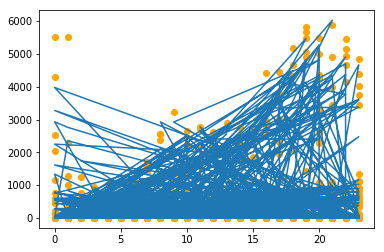

In [54]:
plt.scatter(x_val['time'],y_val,color='#FFA500')
plt.plot(x_val['time'],y_pred)
plt.show()